<a href="https://colab.research.google.com/github/MrCherveN/Machine-Learning--4-0_HomeTasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Machine Learning для людей  4.0/Модуль 2. Навчання з учителем/Тема 2.1 Лінійна регресія. Методи оцінки точності прогностичної моделі/data/medical-charges.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Відповідь:***
1. Проаналізувати середні значення колонки charges в розрізі нетаргетних колонок.

2. Побудувати матрицю коерляцїї, для аналізу взаємодії charges з іншими нетаргетними колоноками.

3. Проаналізувати вплив комбінацій нетаргетних колонок на значення charges.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Distribution of Medical Charges by Sex',

                  labels={'charges': 'Medical Charges',
                          'sex': 'Sex'})
fig.update_layout(bargap=0.1)
fig.show()

***Спостереження:***
- Розподіл витрат для обох статей має равоскошену форму.
- Основна маса записів по витратам в обох групах  знаходиться в діапазоні до 14-16 тисяч.
- Медіанні значеня  для обох статей знаходятся майже на одному рівні.
- В обох групах спостерігається значна кількість викидів.
- Загалом, розподіл між групами схожий.

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Distribution of Medical Charges by Region',
                  labels={'charges': 'Medical Charges',
                          'region': 'Region'})
fig.update_layout(bargap=0.1)
fig.show()

***Спостереження:***
- Розподіл витрат для для всіх груп має правоскошену форму.
- Основна маса записів по витратам  знаходиться в діапазоні до 14-16 тисяч.
- Медіанні значеня  знаходятся майже на одному рівні, але southwest має трохи вище значення.
- В усіх групах спостерігається значна кількість викидів.
- Найбільший розкид значень ("вуса") має southeast.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
px.histogram(df, x='smoker', color='region', title='Smoker by Region')

***Спостереження***
- Загальна частка некурців в наборі більша ніж курці.
- Розподілк курці та некурців по регіонах приблизно однаковий. Кількість курців по southeast трохи быльший.  

In [ ]:
px.histogram(df, x='smoker', color='children', title='Smoker by Children')

***Спостереження***
- Загальна частка некурців в наборі більша ніж курці.
- Як середкурців, так і серед некурців переважають записи в яких вказано кількістю дітей. На другому місці - записи з однією дитиною.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(df,
                   x='children',
                   y='charges',
                   box=True,
                   points='all',
                   title='Charges by Children',
                   labels={'charges': 'Medical Charges',
                          'children': 'children'})
fig.show()

***Спостереження***

- Медіанні значення знаходяться на одному рівні.
- Графіки з "0", "1", "2"  та "3" дітьми мають більш ширщий діапазон значень виплат.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = df[df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

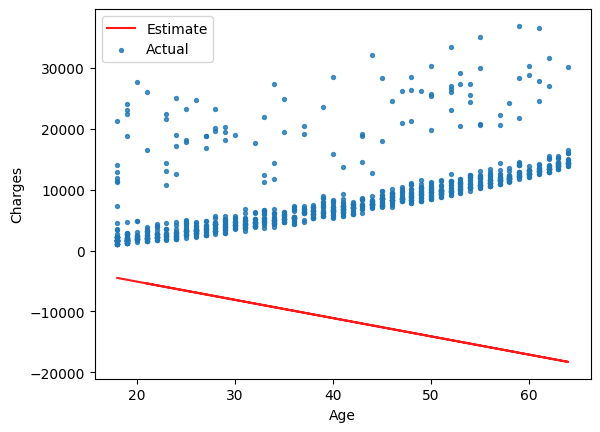

In [ ]:
try_parameters(non_smoker_df, -300, 900)

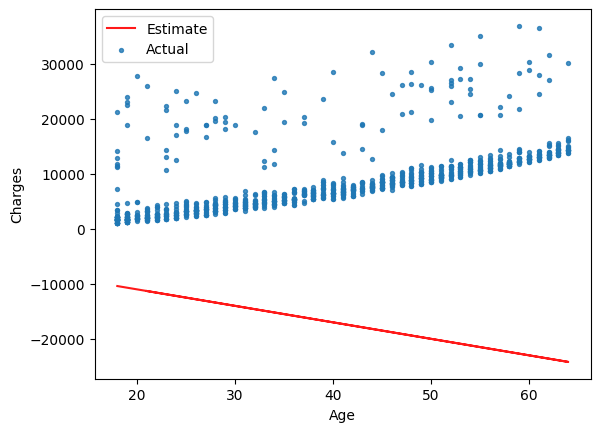

In [ ]:
try_parameters(non_smoker_df, -300, -5000)

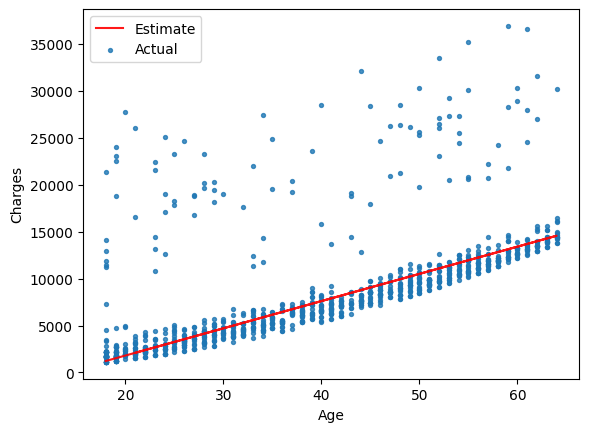

In [ ]:
try_parameters(non_smoker_df, 290, -4000)

***Спостереження***

-При зміні w відбувається зміна кута нахилу прямої, а при зміні b - зміщення її вверх чи вниз.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
import numpy as np

In [ ]:
def root_mean_squared_error(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    n = len(estimated_charges)
    rmse = np.sqrt((np.mean(np.square(estimated_charges - target))))

    return rmse

In [ ]:
root_mean_squared_error(non_smoker_df, -300, 900)

np.float64(21445.68369401018)

In [ ]:
root_mean_squared_error(non_smoker_df, -300, -5000)

np.float64(26889.69714895648)

In [ ]:
root_mean_squared_error(non_smoker_df, 290, -4000)

np.float64(4781.916463526881)

***Відповідь***
- Найнижче значення отримане вручну мною дорівнює 4 781.92.


 - Загальна стратегія для знаходження кращих значень параметрі w  та  b  методом проб та помилок:
 1. Побудувати графік.
 2. Визначити тренд розподілу точок на графіку.
 3. Підібрати стартові значення до тренду так, аби графік був ближче до середніх значень.
 4. Визначити та зафіксувати за домомогою root_mean_squared_error значення  RMSE.
 5. Провести підбір нових параметрів для побудови графіка та знаходження нового значення RMSE. Після чого провести порівняння з попереднім значенням RMSE. Якщо воно краще, то фіксуємо значення, якщо ні, то зберігаємо попреднє значення.
 6. Проводимо вищезазначені маніпуляції до отримання прийнятного результату.